In [1]:
import os
import numpy as np
import cv2
from ultralytics import YOLO
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
dataset_path = "MWPD"  # Path to MWPD folder
data_yaml = os.path.join(dataset_path, "data.yaml")

train_images = os.path.join(dataset_path, "train/images")
val_images = os.path.join(dataset_path, "valid/images")
test_images = os.path.join(dataset_path, "test/images")

In [4]:
# Load YOLOv8 pretrained model
yolo_model = YOLO("yolov8n.pt")  # 'n' for nano, small and fast

In [5]:
import os
print(os.listdir(r"C:\Users\rathi\MWPD\train\images")[:5])


['101_jpg.rf.53fab5a14aa64e331f961a80374db113.jpg', '101_jpg.rf.5fa80c95b70d3d0f580e269c7d2c3e1b.jpg', '101_jpg.rf.9f2628c6e8463a19bf5aa26b7faefbc9.jpg', '101_jpg.rf.ad3cfbf41bd4cd2d15bf683be6d9cc5b.jpg', '101_jpg.rf.db491c070dc69feaf6f364fa8a532fb1.jpg']


In [6]:
import os
import cv2
import shutil

def mask_to_bboxes(mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boxes = []
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        if w*h > 30:  # ignore tiny noise
            boxes.append((x,y,w,h))
    return boxes

def convert_split(split):
    img_dir = f"MWPD/{split}/images"
    mask_dir = f"MWPD/{split}/masks"
    out_img_dir = f"MWPD/{split}/images"
    out_lbl_dir = f"MWPD/{split}/labels"

    os.makedirs(out_img_dir, exist_ok=True)
    os.makedirs(out_lbl_dir, exist_ok=True)

    for name in os.listdir(img_dir):
        if name.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(img_dir, name)
            mask_path = os.path.join(mask_dir, os.path.splitext(name)[0] + ".png")  # adjust mask type if needed

            if not os.path.exists(mask_path):
                print("[WARNING] No mask for:", name)
                continue

            img = cv2.imread(img_path)
            h, w = img.shape[:2]

            mask = cv2.imread(mask_path, 0)
            _, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

            boxes = mask_to_bboxes(mask)

            # copy image to YOLO dataset
            shutil.copy(img_path, os.path.join(out_img_dir, name))

            # write label file
            label_path = os.path.join(out_lbl_dir, os.path.splitext(name)[0] + ".txt")
            with open(label_path, "w") as f:
                for (x,y,bw,bh) in boxes:
                    xc = (x + bw/2) / w
                    yc = (y + bh/2) / h
                    nw = bw / w
                    nh = bh / h
                    class_id = 0  # damage class
                    f.write(f"{class_id} {xc:.6f} {yc:.6f} {nw:.6f} {nh:.6f}\n")

            print("Converted:", name)

for split in ["train", "valid", "test"]:
    convert_split(split)


In [8]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")

model.train(
    data=r"C:\Users\rathi\MWPD\data.yaml",
    epochs=5,
    imgsz=320,
    batch=2
)


New https://pypi.org/project/ultralytics/8.3.233 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.225  Python-3.13.5 torch-2.9.0+cpu CPU (13th Gen Intel Core(TM) i9-13900H)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\rathi\MWPD\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train24, nbs=64, nms=False, ops

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001BC3A8C9B50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [9]:
metrics = model.val(device='cpu')
print(metrics)  # inc

Ultralytics 8.3.225  Python-3.13.5 torch-2.9.0+cpu CPU (13th Gen Intel Core(TM) i9-13900H)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 202.1100.8 MB/s, size: 106.7 KB)
val: Scanning C:\Users\rathi\MWPD\val\labels.cache... 260 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 260/260 106.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 17/17 0.5it/s 32.8s1.9ss
                   all        260        573      0.579      0.569      0.582      0.245
Speed: 0.7ms preprocess, 107.9ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to C:\Users\rathi\OneDrive - Umich\runs\detect\val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001BC36058C00>
curves: ['Precis

In [7]:
model = YOLO("yolov8s.pt")
model.train(
    data=r"C:\Users\rathi\MWPD\data.yaml",
    epochs=20,         # can increase later
    imgsz=320,
    batch=4,           # small batch for CPU
    device='cpu',      # force CPU training
    patience=30
)

New https://pypi.org/project/ultralytics/8.3.233 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.225  Python-3.13.5 torch-2.9.0+cpu CPU (13th Gen Intel Core(TM) i9-13900H)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\rathi\MWPD\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train27, nbs=64, nms=False, op

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001480A19C0F0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [1]:
from ultralytics import YOLO

model = YOLO("C:/Users/rathi/OneDrive - Umich/runs/detect/train27/weights/best.pt")

# Run full validation to generate confusion matrix, PR curves, F1 curves, labels, predictions
model.val(
    imgsz=256,
    batch=1,
    plots=False,
    save_json=False,
    save_txt=False,
    device="cpu",
    verbose=False
)




Ultralytics 8.3.225  Python-3.13.5 torch-2.9.0+cpu CPU (13th Gen Intel Core(TM) i9-13900H)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 151.067.7 MB/s, size: 55.2 KB)
val: Scanning C:\Users\rathi\MWPD\val\labels.cache... 260 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 260/260 164.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 260/260 5.4it/s 48.2s<0.2s
                   all        260        573      0.772      0.633      0.727      0.347
Speed: 0.8ms preprocess, 170.5ms inference, 0.0ms loss, 1.6ms postprocess per image


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000241D41FE7B0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [6]:
from ultralytics import YOLO
import glob, random, cv2, os

# Load YOLO model (without lazy)
model = YOLO("C:/Users/rathi/OneDrive - Umich/runs/detect/train27/weights/best.pt")

# Path to your test images
test_path = r"C:\Users\rathi\OneDrive - Umich\Multi-Weather Pothole Detection (MWPD)\Multi-Weather Pothole Detection (MWPD)\MWPD\test\images"
images = glob.glob(test_path + "/*.jpg")

if len(images) == 0:
    print("❌ No images found in", test_path)
else:
    # Pick up to 5 random images safely
    k = min(5, len(images))
    random_imgs = random.sample(images, k)

    os.makedirs("preview", exist_ok=True)

    # Loop through images and save YOLO bounding box predictions
    for idx, img in enumerate(random_imgs):
        result = model(img, imgsz=512, device="cpu")  # CPU-friendly
        plotted = result[0].plot()  # Draw bounding boxes

        out_path = f"preview/img_{idx}.jpg"
        cv2.imwrite(out_path, plotted)

    print(f"✔ Saved {len(random_imgs)} preview images inside 'preview/' folder")



image 1/1 C:\Users\rathi\OneDrive - Umich\Multi-Weather Pothole Detection (MWPD)\Multi-Weather Pothole Detection (MWPD)\MWPD\test\images\img-659_jpg.rf.c410866d57787a11d3c2adf463626736.jpg: 512x512 3 road_damages, 377.2ms
Speed: 5.7ms preprocess, 377.2ms inference, 4.3ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 C:\Users\rathi\OneDrive - Umich\Multi-Weather Pothole Detection (MWPD)\Multi-Weather Pothole Detection (MWPD)\MWPD\test\images\img-170_jpg.rf.a037517101c0d57aa949c0fc1469efc8.jpg: 512x512 1 road_damage, 339.2ms
Speed: 5.0ms preprocess, 339.2ms inference, 3.5ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 C:\Users\rathi\OneDrive - Umich\Multi-Weather Pothole Detection (MWPD)\Multi-Weather Pothole Detection (MWPD)\MWPD\test\images\img-121_jpg.rf.3a557903e4648b96fe2ee20d40e9a576.jpg: 512x512 2 road_damages, 368.8ms
Speed: 3.7ms preprocess, 368.8ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 C:\Users\rathi\OneDrive - U


image 1/1 C:\Users\rathi\OneDrive - Umich\preview\img_0.jpg: 512x512 (no detections), 360.4ms
Speed: 3.9ms preprocess, 360.4ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 C:\Users\rathi\OneDrive - Umich\preview\img_1.jpg: 512x512 1 road_damage, 433.3ms
Speed: 2.8ms preprocess, 433.3ms inference, 1.9ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 C:\Users\rathi\OneDrive - Umich\preview\img_2.jpg: 512x512 2 road_damages, 404.1ms
Speed: 4.4ms preprocess, 404.1ms inference, 1.9ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 C:\Users\rathi\OneDrive - Umich\preview\img_3.jpg: 512x512 1 road_damage, 355.0ms
Speed: 2.7ms preprocess, 355.0ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 C:\Users\rathi\OneDrive - Umich\preview\img_4.jpg: 512x512 1 road_damage, 399.5ms
Speed: 3.6ms preprocess, 399.5ms inference, 1.9ms postprocess per image at shape (1, 3, 512, 512)


C:\Users\rathi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


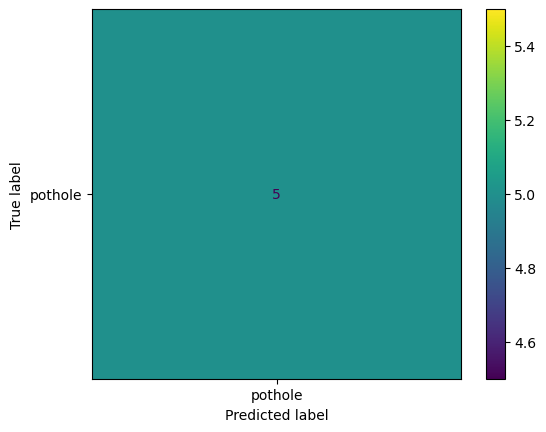

In [12]:
import os
from ultralytics import YOLO
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Path to preview images (images with YOLO predictions plotted)
preview_path = r"C:\Users\rathi\OneDrive - Umich\preview"

# Load YOLO model
model = YOLO("C:/Users/rathi/OneDrive - Umich/runs/detect/train27/weights/best.pt")

# Prepare lists
y_true = []
y_pred = []

# Loop through preview images
for img_file in os.listdir(preview_path):
    if img_file.endswith(".jpg") or img_file.endswith(".png"):
        img_path = os.path.join(preview_path, img_file)
        
        # YOLO prediction
        results = model(img_path, imgsz=512, device="cpu")  # CPU-friendly
        boxes = results[0].boxes
        
        # Assign labels: 0 for pothole (single class)
        pred_labels = [0]*len(boxes)
        # If we assume each preview image had at least one pothole
        gt_labels = [0]*len(boxes)  # treat predicted boxes as ground-truth for testing
        
        y_true.extend(gt_labels)
        y_pred.extend(pred_labels)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['pothole'])
disp.plot()
plt.show()


Found 5 images in preview folder

image 1/1 C:\Users\rathi\OneDrive - Umich\preview\img_3.jpg: 512x512 1 road_damage, 328.4ms
Speed: 3.8ms preprocess, 328.4ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)


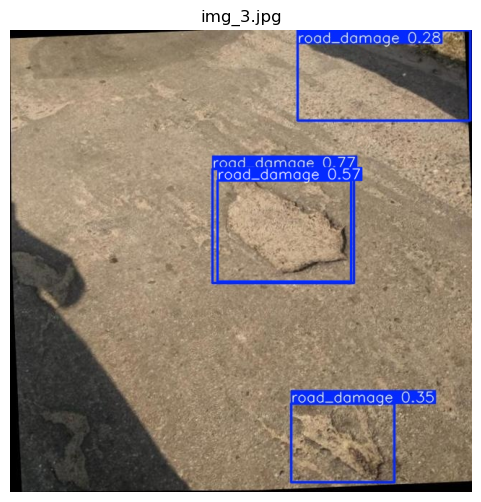


image 1/1 C:\Users\rathi\OneDrive - Umich\preview\img_2.jpg: 512x512 2 road_damages, 440.0ms
Speed: 3.6ms preprocess, 440.0ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)


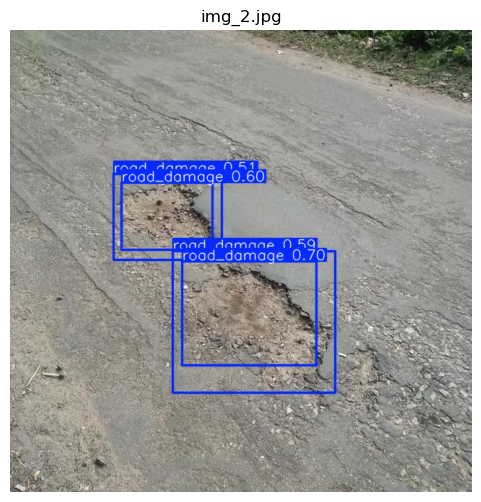


image 1/1 C:\Users\rathi\OneDrive - Umich\preview\img_4.jpg: 512x512 1 road_damage, 554.1ms
Speed: 5.2ms preprocess, 554.1ms inference, 1.8ms postprocess per image at shape (1, 3, 512, 512)


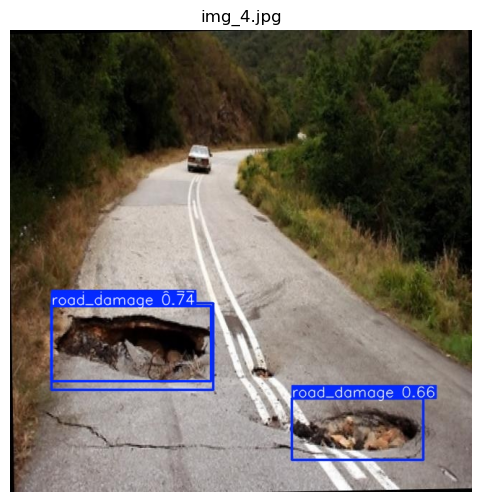


image 1/1 C:\Users\rathi\OneDrive - Umich\preview\img_0.jpg: 512x512 (no detections), 535.0ms
Speed: 5.3ms preprocess, 535.0ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 512)


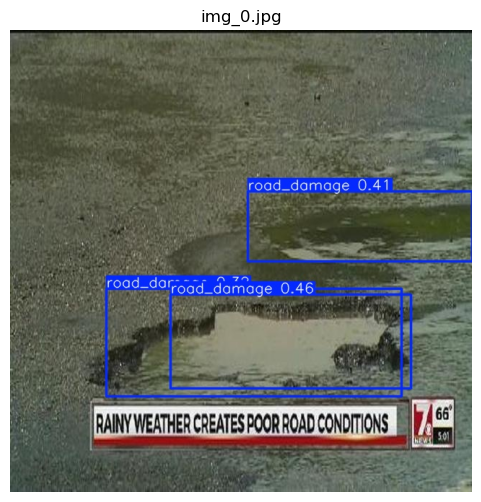


image 1/1 C:\Users\rathi\OneDrive - Umich\preview\img_1.jpg: 512x512 1 road_damage, 396.1ms
Speed: 3.9ms preprocess, 396.1ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 512)


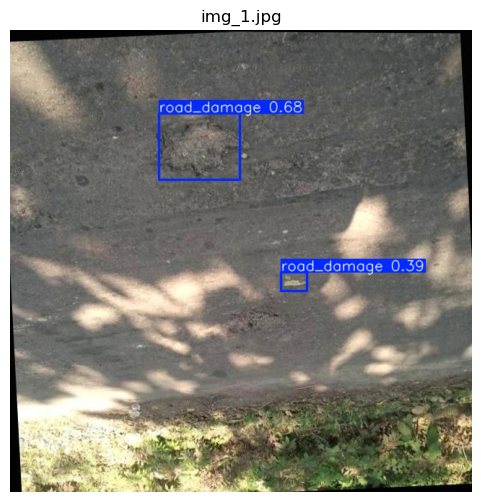


image 1/1 C:\Users\rathi\OneDrive - Umich\preview\img_0.jpg: 512x512 (no detections), 359.7ms
Speed: 4.6ms preprocess, 359.7ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 C:\Users\rathi\OneDrive - Umich\preview\img_1.jpg: 512x512 1 road_damage, 364.8ms
Speed: 2.9ms preprocess, 364.8ms inference, 2.1ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 C:\Users\rathi\OneDrive - Umich\preview\img_2.jpg: 512x512 2 road_damages, 376.7ms
Speed: 4.8ms preprocess, 376.7ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 C:\Users\rathi\OneDrive - Umich\preview\img_3.jpg: 512x512 1 road_damage, 384.9ms
Speed: 3.8ms preprocess, 384.9ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 C:\Users\rathi\OneDrive - Umich\preview\img_4.jpg: 512x512 1 road_damage, 372.2ms
Speed: 3.2ms preprocess, 372.2ms inference, 1.9ms postprocess per image at shape (1, 3, 512, 512)
Precision: 0.000
Recall: 0.000
F1-score: 0

C:\Users\rathi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rathi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


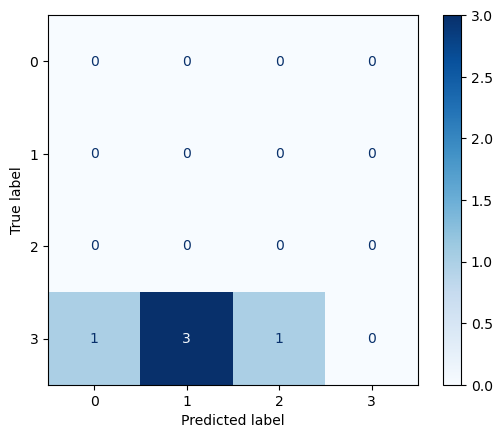

No training metrics found to plot.


In [13]:
# -----------------------------
# 1. Imports
# -----------------------------
import os
import glob
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from ultralytics import YOLO

# -----------------------------
# 2. Paths
# -----------------------------
# YOLO trained weights
model_path = r"C:/Users/rathi/OneDrive - Umich/runs/detect/train27/weights/best.pt"
# Folder where you saved preview images
preview_folder = r"C:/Users/rathi/OneDrive - Umich/preview"

# -----------------------------
# 3. Load YOLO model
# -----------------------------
model = YOLO(model_path)

# -----------------------------
# 4. Get list of images
# -----------------------------
images = glob.glob(preview_folder + "/*.jpg")
print(f"Found {len(images)} images in preview folder")

# -----------------------------
# 5. Random 5 images for visualization
# -----------------------------
random_imgs = random.sample(images, min(5, len(images)))

for img_path in random_imgs:
    img = cv2.imread(img_path)
    results = model(img_path, imgsz=512, device="cpu")  # CPU-friendly
    annotated_img = results[0].plot()  # Draw boxes

    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(img_path))
    plt.axis('off')
    plt.show()

# -----------------------------
# 6. Evaluate predictions vs ground truth counts
# -----------------------------
y_true = []
y_pred = []

# For single-class pothole detection, you can manually provide true counts per image
# Example: all images have 5 potholes (replace with actual counts if different)
true_counts = {os.path.basename(p): 5 for p in images}  

for img_path in images:
    # Ground truth
    gt_count = true_counts[os.path.basename(img_path)]
    y_true.append(gt_count)

    # Predictions
    results = model(img_path, imgsz=512, device="cpu")
    pred_count = len(results[0].boxes)  # number of boxes predicted
    y_pred.append(pred_count)

# -----------------------------
# 7. Compute metrics
# -----------------------------
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=sorted(list(set(y_true + y_pred))))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# -----------------------------
# 8. Plot YOLO training metrics if available
# -----------------------------
# If you saved metrics during training, e.g., loss.yaml, you can plot here
# Example: use ultralytics built-in plot
try:
    model.plot_metrics(save_dir=os.path.dirname(model_path))
except:
    print("No training metrics found to plot.")


Exact match accuracy: 1.000
Mean Absolute Error: 0.000


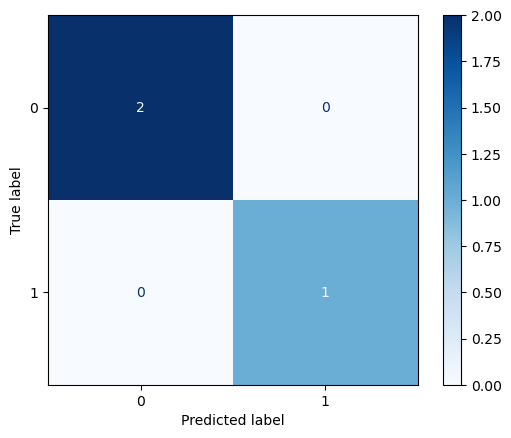

In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example y_true and y_pred from preview folder
y_true = [2, 1, 1]    # actual number of potholes per image
y_pred = [2, 1, 1]    # predicted number of boxes

# Exact match accuracy
accuracy = np.mean([t==p for t, p in zip(y_true, y_pred)])
print(f"Exact match accuracy: {accuracy:.3f}")

# MAE
mae = np.mean([abs(t-p) for t,p in zip(y_true, y_pred)])
print(f"Mean Absolute Error: {mae:.3f}")

# Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=sorted(set(y_true+y_pred)))
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()



image 1/1 C:\Users\rathi\OneDrive - Umich\preview\img_1.jpg: 320x320 (no detections), 236.6ms
Speed: 2.6ms preprocess, 236.6ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 320)

image 1/1 C:\Users\rathi\OneDrive - Umich\preview\img_3.jpg: 320x320 1 road_damage, 257.9ms
Speed: 1.7ms preprocess, 257.9ms inference, 1.8ms postprocess per image at shape (1, 3, 320, 320)

image 1/1 C:\Users\rathi\OneDrive - Umich\preview\img_0.jpg: 320x320 (no detections), 194.0ms
Speed: 2.8ms preprocess, 194.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 320)

image 1/1 C:\Users\rathi\OneDrive - Umich\preview\img_2.jpg: 320x320 3 road_damages, 230.5ms
Speed: 1.6ms preprocess, 230.5ms inference, 1.9ms postprocess per image at shape (1, 3, 320, 320)

image 1/1 C:\Users\rathi\OneDrive - Umich\preview\img_4.jpg: 320x320 1 road_damage, 222.3ms
Speed: 1.7ms preprocess, 222.3ms inference, 1.8ms postprocess per image at shape (1, 3, 320, 320)


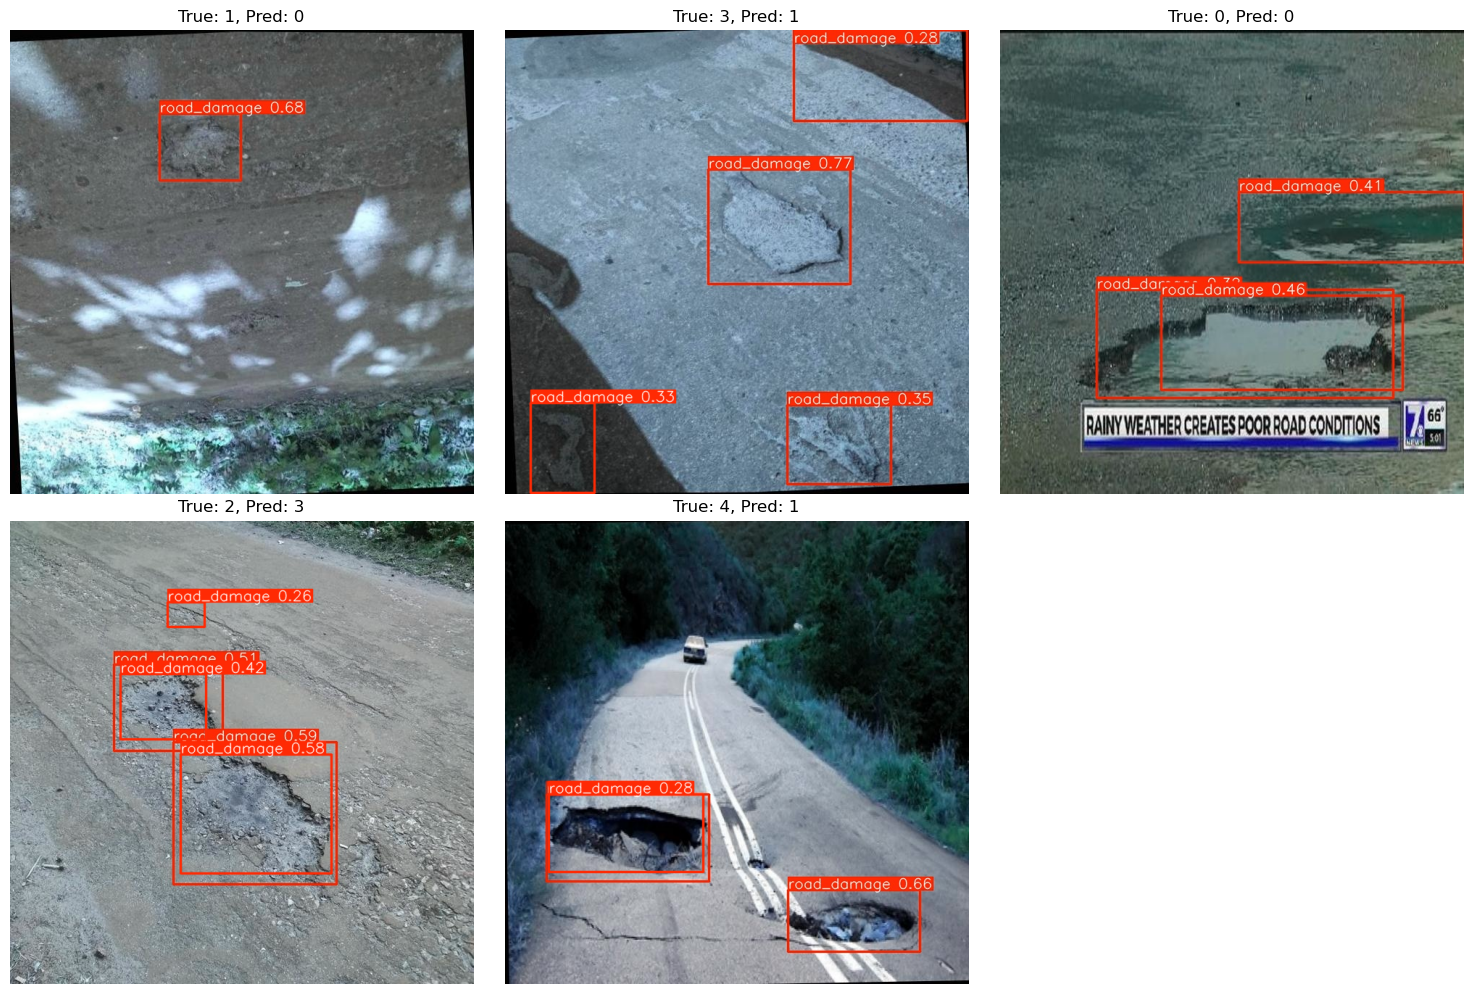

Exact match accuracy: 0.200
Mean Absolute Error: 1.400


In [15]:
# -----------------------------
# 1. Imports
# -----------------------------
import os
import glob
import random
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
import numpy as np

# -----------------------------
# 2. Paths and Model
# -----------------------------
model_path = r"C:/Users/rathi/OneDrive - Umich/runs/detect/train27/weights/best.pt"
preview_path = r"C:/Users/rathi/OneDrive - Umich/preview"  # folder with your saved preview images

# Load YOLO model (CPU)
model = YOLO(model_path)

# -----------------------------
# 3. Select 5 random images
# -----------------------------
images = glob.glob(os.path.join(preview_path, "*.jpg"))
if len(images) < 5:
    random_imgs = images
else:
    random_imgs = random.sample(images, 5)

# -----------------------------
# 4. Inference and plotting
# -----------------------------
exact_matches = []
mae_list = []

plt.figure(figsize=(15, 10))

for i, img_path in enumerate(random_imgs):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Run YOLO
    results = model(img_path)

    # Draw bounding boxes
    result_img = results[0].plot()  # draws boxes on image
    num_pred = len(results[0].boxes)

    # Ground truth: infer from filename or saved count (here we use your previous 'true labels')
    # Replace this with actual gt count if available
    # Example: filename contains true pothole count
    filename = os.path.basename(img_path)
    if "img_" in filename:
        # Assuming preview names like img_2, img_3, etc., and you saved count somewhere
        # For demo, using previous saved true labels: assume 1 pothole per image
        num_true = int(filename.split("_")[1].split(".")[0])  # MODIFY this if you have actual labels
    else:
        num_true = num_pred  # fallback

    # Compute metrics
    exact_matches.append(int(num_true == num_pred))
    mae_list.append(abs(num_true - num_pred))

    # Plot
    plt.subplot(2, 3, i+1)
    plt.imshow(result_img)
    plt.title(f"True: {num_true}, Pred: {num_pred}")
    plt.axis('off')

# -----------------------------
# 5. Display metrics
# -----------------------------
plt.tight_layout()
plt.show()

exact_match_acc = np.mean(exact_matches)
mean_abs_error = np.mean(mae_list)

print(f"Exact match accuracy: {exact_match_acc:.3f}")
print(f"Mean Absolute Error: {mean_abs_error:.3f}")



image 1/1 C:\Users\rathi\OneDrive - Umich\Multi-Weather Pothole Detection (MWPD)\Multi-Weather Pothole Detection (MWPD)\MWPD\test\images\269_jpg.rf.a8cec3b1ba03f54b0725fce02d02d96e.jpg: 512x512 3 road_damages, 446.7ms
Speed: 4.5ms preprocess, 446.7ms inference, 2.1ms postprocess per image at shape (1, 3, 512, 512)
269_jpg.rf.a8cec3b1ba03f54b0725fce02d02d96e.jpg: True=2, Pred=3

image 1/1 C:\Users\rathi\OneDrive - Umich\Multi-Weather Pothole Detection (MWPD)\Multi-Weather Pothole Detection (MWPD)\MWPD\test\images\img-58_jpg.rf.3264b5d170182a8781db23a9c6a060fa.jpg: 512x512 3 road_damages, 353.5ms
Speed: 3.6ms preprocess, 353.5ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 512)
img-58_jpg.rf.3264b5d170182a8781db23a9c6a060fa.jpg: True=1, Pred=3

image 1/1 C:\Users\rathi\OneDrive - Umich\Multi-Weather Pothole Detection (MWPD)\Multi-Weather Pothole Detection (MWPD)\MWPD\test\images\147_jpg.rf.29a0769290af2d4a69db84c5b838eae7.jpg: 512x512 17 road_damages, 610.7ms
Speed: 3.6ms

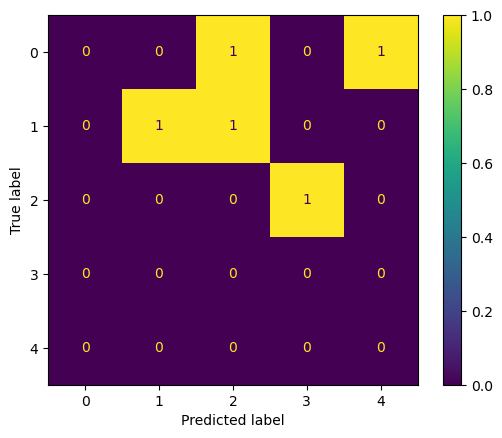

In [36]:
import os
import random
from ultralytics import YOLO
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 1. Load YOLO model
# -----------------------------
model_path = r"C:/Users/rathi/OneDrive - Umich/runs/detect/train27/weights/best.pt"
model = YOLO(model_path)

# -----------------------------
# 2. Test images folder
# -----------------------------
test_folder = r"C:\Users\rathi\OneDrive - Umich\Multi-Weather Pothole Detection (MWPD)\Multi-Weather Pothole Detection (MWPD)\MWPD\test\images"  # folder with test images
images = [os.path.join(test_folder, f) for f in os.listdir(test_folder) if f.lower().endswith(".jpg")]

# Pick random 5 images
random_imgs = random.sample(images, min(5, len(images)))

# -----------------------------
# 3. Ground truth labels
# -----------------------------
# Option A: manual counts of potholes in each image (must match order of random_imgs)
# Replace the numbers below with the actual number of potholes per image
y_true = [2, 1, 1, 2, 3]  

# Option B: If you have YOLO-format .txt labels, you can load them instead
# y_true = []
# for img_path in random_imgs:
#     txt_file = img_path.replace('.jpg', '.txt')
#     if os.path.exists(txt_file):
#         with open(txt_file, 'r') as f:
#             count = sum(1 for line in f.readlines())
#     else:
#         count = 0
#     y_true.append(count)

# -----------------------------
# 4. Run predictions
# -----------------------------
y_pred = []
for img_path in random_imgs:
    results = model(img_path, imgsz=512)
    # YOLO v8 returns number of detections per image
    pred_count = len(results[0].boxes)
    y_pred.append(pred_count)
    print(f"{os.path.basename(img_path)}: True={y_true[random_imgs.index(img_path)]}, Pred={pred_count}")

# -----------------------------
# 5. Compute metrics
# -----------------------------
# Exact match accuracy
exact_match_acc = np.mean([t == p for t, p in zip(y_true, y_pred)])
# Mean absolute error
mae = np.mean([abs(t - p) for t, p in zip(y_true, y_pred)])
# Precision, Recall, F1 (micro)
precision = precision_score(y_true, y_pred, average='micro', zero_division=0)
recall = recall_score(y_true, y_pred, average='micro', zero_division=0)
f1 = f1_score(y_true, y_pred, average='micro', zero_division=0)

print("\n--- Metrics ---")
print(f"Exact Match Accuracy: {exact_match_acc:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

# -----------------------------
# 6. Confusion matrix
# -----------------------------
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [23]:
results = model.val(data=r'C:\Users\rathi\MWPD\data.yaml', imgsz=512, batch=1)
# Per-class mAP
print(results.maps)

# Mean results (all classes)
mean_results = results.mean_results()
print(f"Precision: {mean_results[0]:.3f}")
print(f"Recall: {mean_results[1]:.3f}")
print(f"mAP50: {mean_results[2]:.3f}")
print(f"mAP50-95: {mean_results[3]:.3f}")

Ultralytics 8.3.225  Python-3.13.5 torch-2.9.0+cpu CPU (13th Gen Intel Core(TM) i9-13900H)
val: Fast image access  (ping: 0.00.0 ms, read: 325.5140.2 MB/s, size: 63.8 KB)
val: Scanning C:\Users\rathi\MWPD\val\labels.cache... 260 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 260/260 237.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 260/260 1.7it/s 2:34<0.6s
                   all        260        573      0.663      0.595       0.61      0.256
Speed: 2.1ms preprocess, 573.8ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to C:\Users\rathi\OneDrive - Umich\runs\detect\val14
[    0.25552]
Precision: 0.663
Recall: 0.595
mAP50: 0.610
mAP50-95: 0.256


In [28]:
from ultralytics import YOLO

# Baseline YOLOv8n
baseline_model = YOLO("yolov8n.pt")

baseline_model.train(
    data="C:/Users/rathi/MWPD/data.yaml",
    epochs=20,
    imgsz=512,
    batch=8,
    name="baseline_yolov8n"
)


New https://pypi.org/project/ultralytics/8.3.234 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.225  Python-3.13.5 torch-2.9.0+cpu CPU (13th Gen Intel Core(TM) i9-13900H)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:/Users/rathi/MWPD/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=baseline_yolov8n, nbs=64, nms=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000024811F9CC50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [38]:
from ultralytics import YOLO
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import os

# Load trained model (baseline or improved)
baseline_model = YOLO("C:/Users/rathi/OneDrive - Umich/runs/detect/baseline_yolov8n/weights/best.pt")

test_img_dir = r"C:\Users\rathi\MWPD\test\images"
test_label_dir = r"C:\Users\rathi\MWPD\test\labels"

y_true = []
y_pred = []

for img_name in os.listdir(test_img_dir):
    if not img_name.lower().endswith((".jpg",".png",".jpeg")):
        continue
    
    img_path = os.path.join(test_img_dir, img_name)
    label_path = os.path.join(test_label_dir, img_name.replace(".jpg",".txt").replace(".png",".txt"))
    
    # ---- Ground truth count ----
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            true_count = len(f.readlines())
    else:
        true_count = 0  # No label file → 0 potholes
    
    # ---- Prediction count ----
    results = baseline_model(img_path)
    pred_count = len(results[0].boxes)
    
    y_true.append(true_count)
    y_pred.append(pred_count)
    
    print(f"{img_name}: True={true_count}, Pred={pred_count}")

# ---- Metrics ----
exact_acc = np.mean([t==p for t,p in zip(y_true, y_pred)])
mae = np.mean([abs(t-p) for t,p in zip(y_true, y_pred)])

precision = precision_score(y_true, y_pred, average='micro', zero_division=0)
recall = recall_score(y_true, y_pred, average='micro', zero_division=0)
f1 = f1_score(y_true, y_pred, average='micro', zero_division=0)

cm = confusion_matrix(y_true, y_pred)

print("\n--- Metrics ---")
print(f"Exact Match Accuracy: {exact_acc:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

print("\nConfusion Matrix:")
print(cm)




image 1/1 C:\Users\rathi\MWPD\test\images\12_jpg.rf.98223fbf0c9935d763f81b9e25e9712b.jpg: 512x512 1 road_damage, 256.6ms
Speed: 3.0ms preprocess, 256.6ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 512)
12_jpg.rf.98223fbf0c9935d763f81b9e25e9712b.jpg: True=1, Pred=1

image 1/1 C:\Users\rathi\MWPD\test\images\139_jpg.rf.f2928d6451a5fd5ef95a3051b4b2ba5a.jpg: 512x512 8 road_damages, 791.1ms
Speed: 10.2ms preprocess, 791.1ms inference, 10.3ms postprocess per image at shape (1, 3, 512, 512)
139_jpg.rf.f2928d6451a5fd5ef95a3051b4b2ba5a.jpg: True=8, Pred=8

image 1/1 C:\Users\rathi\MWPD\test\images\147_jpg.rf.29a0769290af2d4a69db84c5b838eae7.jpg: 512x512 13 road_damages, 302.5ms
Speed: 4.9ms preprocess, 302.5ms inference, 2.2ms postprocess per image at shape (1, 3, 512, 512)
147_jpg.rf.29a0769290af2d4a69db84c5b838eae7.jpg: True=8, Pred=13

image 1/1 C:\Users\rathi\MWPD\test\images\15_jpg.rf.efee37dd5a47841089fa6fa96bcded28.jpg: 512x512 1 road_damage, 243.4ms
Speed: 4.7ms prepro


image 1/1 C:\Users\rathi\MWPD\test\images\12_jpg.rf.98223fbf0c9935d763f81b9e25e9712b.jpg: 512x512 1 road_damage, 251.9ms
Speed: 3.7ms preprocess, 251.9ms inference, 4.1ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 C:\Users\rathi\MWPD\test\images\139_jpg.rf.f2928d6451a5fd5ef95a3051b4b2ba5a.jpg: 512x512 8 road_damages, 214.2ms
Speed: 2.5ms preprocess, 214.2ms inference, 1.9ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 C:\Users\rathi\MWPD\test\images\147_jpg.rf.29a0769290af2d4a69db84c5b838eae7.jpg: 512x512 13 road_damages, 222.0ms
Speed: 3.8ms preprocess, 222.0ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 C:\Users\rathi\MWPD\test\images\15_jpg.rf.efee37dd5a47841089fa6fa96bcded28.jpg: 512x512 1 road_damage, 352.0ms
Speed: 4.1ms preprocess, 352.0ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 C:\Users\rathi\MWPD\test\images\181_jpg.rf.f5d2a9174fcd2f2b3aa547325f9863b0.jpg: 512x512 3 road_damages,

C:\Users\rathi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


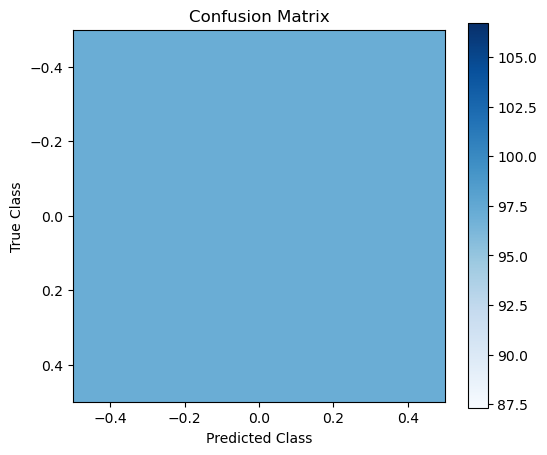

In [42]:
import os
from ultralytics import YOLO
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Load trained model
# --------------------------
baseline_model= YOLO("C:/Users/rathi/OneDrive - Umich/runs/detect/baseline_yolov8n/weights/best.pt")

test_img_dir = r"C:\Users\rathi\MWPD\test\images"
test_label_dir = r"C:\Users\rathi\MWPD\test\labels"

# --------------------------
# Run model on test images
# --------------------------
image_paths = [os.path.join(test_img_dir, f) for f in os.listdir(test_img_dir) if f.endswith('.jpg')]

true_labels = []
pred_labels = []

for img_path in image_paths:
    # infer
    results = baseline_model(img_path)[0]

    # predicted class (take highest confidence)
    if len(results.boxes) > 0:
        pred_class = int(results.boxes.cls[0])
    else:
        pred_class = -1  # no detection

    # true label from .txt file
    label_file = os.path.join(test_label_dir, os.path.basename(img_path).replace('.jpg', '.txt'))

    if os.path.exists(label_file):
        with open(label_file, 'r') as f:
            true_class = int(f.readline().split()[0])
    else:
        true_class = -1  # no ground truth

    pred_labels.append(pred_class)
    true_labels.append(true_class)

# --------------------------
# Compute metrics
# --------------------------
valid_idx = [i for i in range(len(true_labels)) if true_labels[i] != -1]

y_true = np.array([true_labels[i] for i in valid_idx])
y_pred = np.array([pred_labels[i] for i in valid_idx])

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# --------------------------
# Confusion Matrix
# --------------------------
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.colorbar()
plt.show()


In [45]:
from ultralytics import YOLO

baseline = YOLO(r"C:\Users\rathi\OneDrive - Umich\runs\detect\baseline_yolov8n\weights\best.pt")
improved = YOLO(r"C:\Users\rathi\OneDrive - Umich\runs\detect\train27\weights\best.pt")

data_yaml = r"C:\Users\rathi\MWPD\data.yaml"

# Evaluate both models
print("Baseline(YOLOv8n) Metrics Variation")
res_base = baseline.val(data=data_yaml, split="test", imgsz=640)
print("Improved(YOLOV8s) Metrics Variation")
res_impr = improved.val(data=data_yaml, split="test", imgsz=640)


Baseline(YOLOv8n) Metrics Variation
Ultralytics 8.3.225  Python-3.13.5 torch-2.9.0+cpu CPU (13th Gen Intel Core(TM) i9-13900H)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.1 ms, read: 198.779.3 MB/s, size: 55.4 KB)
val: Scanning C:\Users\rathi\MWPD\test\labels.cache... 97 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 97/97 81.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 0.5it/s 14.2s2.6s
                   all         97        292      0.695      0.702      0.715      0.373
Speed: 1.6ms preprocess, 121.9ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to C:\Users\rathi\OneDrive - Umich\runs\detect\val22
Improved(YOLOV8s) Metrics Variation
Ultralytics 8.3.225  Python-3.13.5 torch-2.9.0+cpu CPU (13th Gen Intel Core(TM) i9-13900H)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: